In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
def plot_metrics(metrics_path, model_name):
    # Load metrics
    if not os.path.exists(metrics_path):
        raise FileNotFoundError(f"Metrics file not found at {metrics_path}")

    df = pd.read_csv(metrics_path)
    print(f"Loaded metrics from {metrics_path}")

    # Detect model type based on column names
    if "val_loss" in df.columns:  # Regressor
        plot_regressor_metrics(df, model_name)
    elif "val_recall@1" in df.columns:  # SBERT
        plot_sbert_metrics(df, model_name)
    else:
        print("Unknown metrics format. Cannot plot.")

In [3]:
def plot_regressor_metrics(df, model_name):
    # Training + Validation Loss
    plt.figure(figsize=(8, 5))
    df_epochs = df[df["epoch"] != "test"]

    plt.plot(df_epochs["epoch"], df_epochs["train_loss"], label="Train Loss")
    plt.plot(df_epochs["epoch"], df_epochs["val_loss"], label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{model_name} - Loss Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Validation RMSE
    plt.figure(figsize=(8, 5))
    plt.plot(df_epochs["epoch"], df_epochs["val_rmse"], label="Validation RMSE", color="orange")
    plt.xlabel("Epoch")
    plt.ylabel("RMSE")
    plt.title(f"{model_name} - Validation RMSE")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Print Test Metrics
    test_row = df[df["epoch"] == "test"]
    if not test_row.empty:
        print(f"\nTest Loss: {test_row['test_loss'].values[0]:.4f} | Test RMSE: {test_row['test_rmse'].values[0]:.4f}")

In [4]:
def plot_sbert_metrics(df, model_name):
    # Train Loss
    plt.figure(figsize=(8, 5))
    df_epochs = df[df["epoch"] != "test"]

    plt.plot(df_epochs["epoch"], df_epochs["train_loss"], label="Train Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{model_name} - Training Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Validation Recall@1
    plt.figure(figsize=(8, 5))
    plt.plot(df_epochs["epoch"], df_epochs["val_recall@1"], label="Validation Recall@1", color="green")
    plt.xlabel("Epoch")
    plt.ylabel("Recall@1")
    plt.title(f"{model_name} - Validation Recall@1")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Validation MRR
    plt.figure(figsize=(8, 5))
    plt.plot(df_epochs["epoch"], df_epochs["val_mrr"], label="Validation MRR", color="orange")
    plt.xlabel("Epoch")
    plt.ylabel("MRR")
    plt.title(f"{model_name} - Validation MRR")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Print Test Metrics
    test_row = df[df["epoch"] == "test"]
    if not test_row.empty:
        print(f"\nTest Recall@1: {test_row['test_recall@1'].values[0]:.4f} | Test MRR: {test_row['test_mrr'].values[0]:.4f}")

Loaded metrics from /Users/sanamoin/Documents/sites/gadgets/recommendation_engine/outputs/meta_review_regressor/run_20250202_233100/metrics/metrics.csv


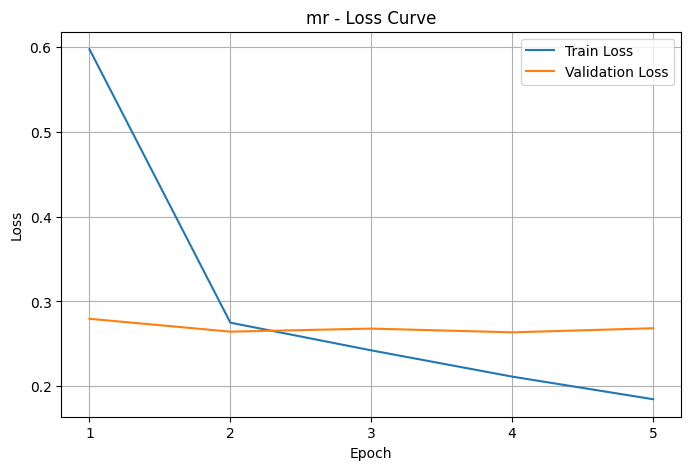

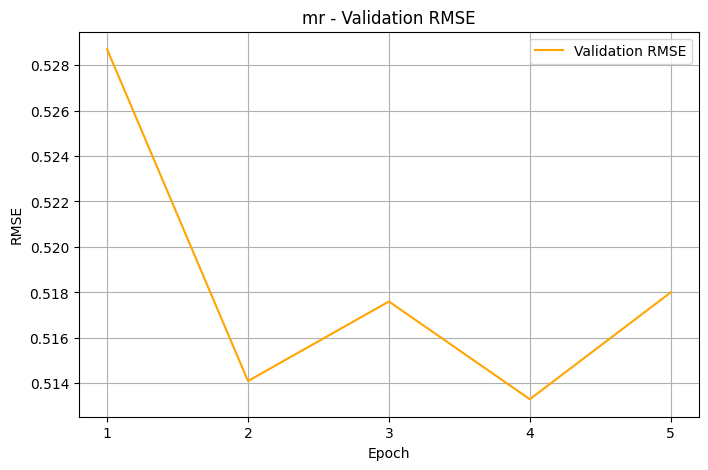


Test Loss: 0.2680 | Test RMSE: 0.5177


In [5]:
plot_metrics('/Users/sanamoin/Documents/sites/gadgets/recommendation_engine/outputs/meta_review_regressor/run_20250202_233100/metrics/metrics.csv', 'mr')


Loaded metrics from /Users/sanamoin/Documents/sites/gadgets/recommendation_engine/outputs/sbert_mps/run_20250308_164539/metrics/metrics.csv


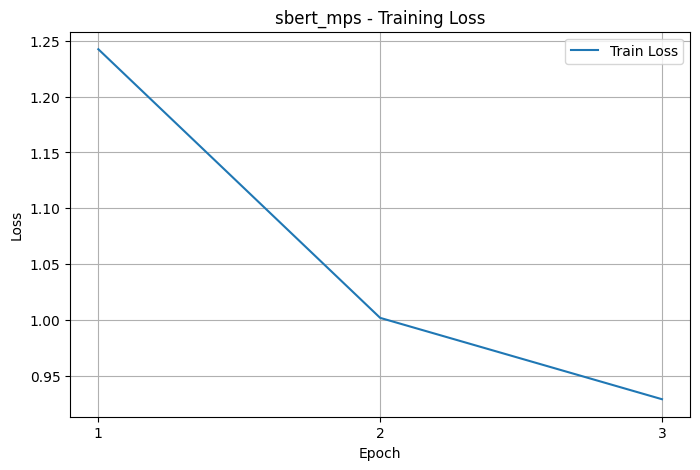

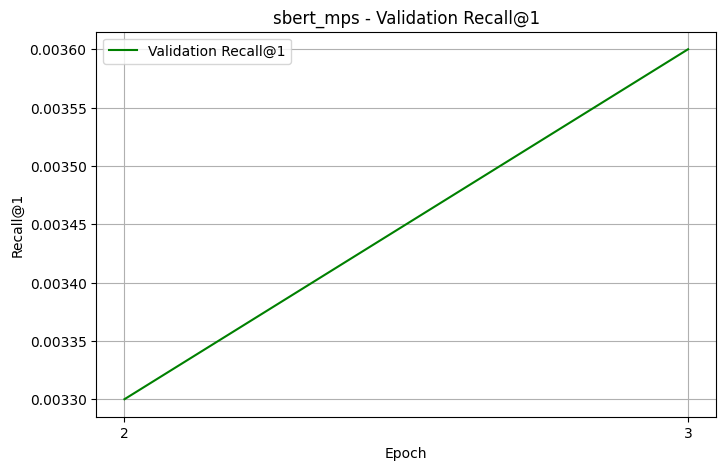

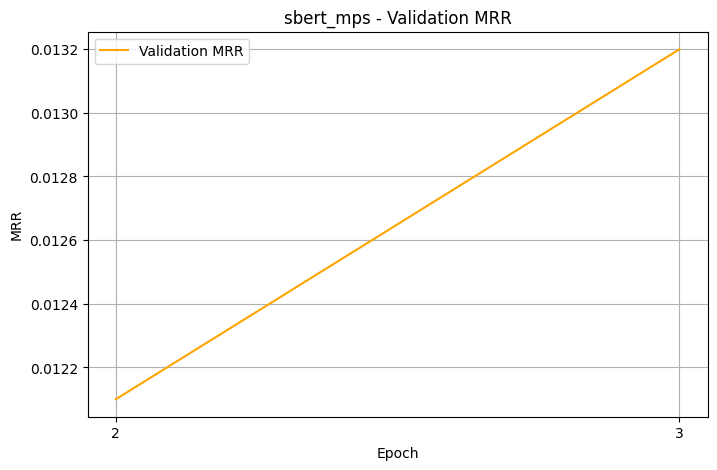


Test Recall@1: 0.0037 | Test MRR: 0.0133


In [7]:
plot_metrics('/Users/sanamoin/Documents/sites/gadgets/recommendation_engine/outputs/sbert_mps/run_20250308_164539/metrics/metrics.csv', 'sbert_mps')

Loaded metrics from /Users/sanamoin/Documents/sites/gadgets/recommendation_engine/outputs/sbert_nvidia/run_20250331_224539/metrics/metrics.csv


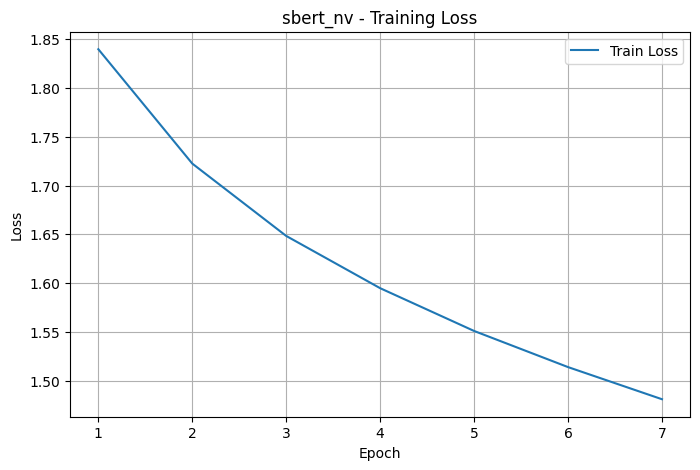

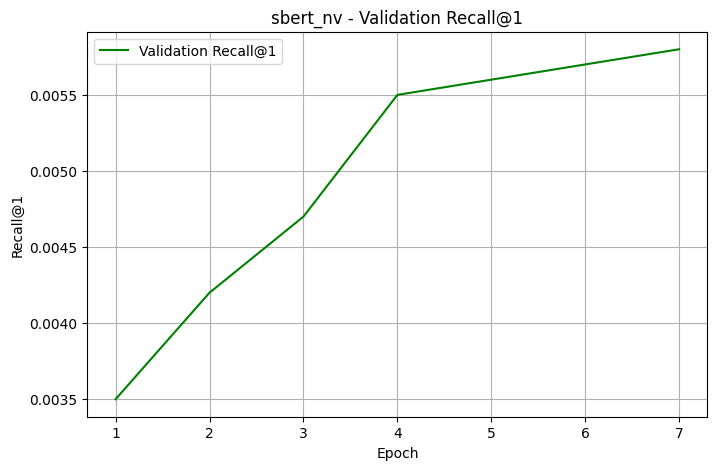

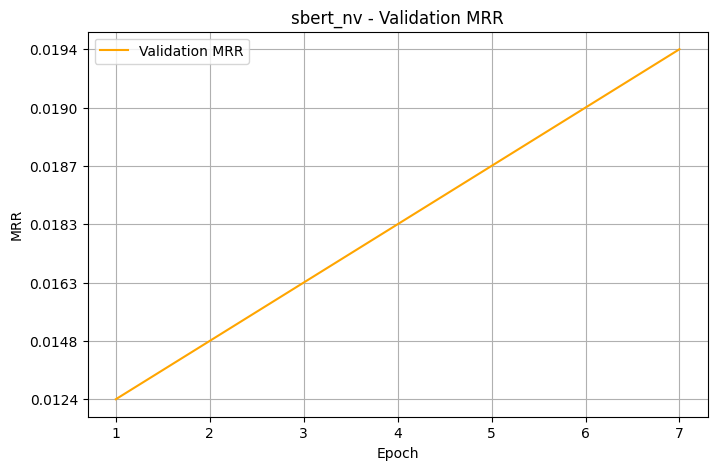


Test Recall@1: 0.0060 | Test MRR: 0.0195


In [8]:
plot_metrics('/Users/sanamoin/Documents/sites/gadgets/recommendation_engine/outputs/sbert_nvidia/run_20250331_224539/metrics/metrics.csv', 'sbert_nv')